#### <i> Evaluating the Effectiveness of Different Machine Learning Models in Predicting Customer Churn in the USA </i>
#### <i> Dataset Link --->  https://www.kaggle.com/datasets/rashadrmammadov/customer-churn-dataset </i>
#### <i> Import Library Files </i>

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

#### <i> Load The Dataset </i>

In [46]:
data = pd.read_csv("customer_churn_data.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


#### <i> Dataset Overview </i>

In [47]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


#### <i> Data Preprocessing </i>

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Inspect the dataset
print("Dataset Info:")
print(data.info())
print("\nSummary:")
print(data.describe())

# 2. Handle missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Convert 'TotalCharges' to numeric (it might contain non-numeric values)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' values with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# 3. Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # Male = 1, Female = 0
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])  # Yes = 1, No = 0

# One-hot encode remaining categorical variables
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 4. Feature scaling
scaler = StandardScaler()
scaled_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# 5. Drop unnecessary columns
# 'customerID' is not useful for modeling
data.drop('customerID', axis=1, inplace=True)

# 6. Split the data into training and testing sets
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-n

#### <i> Data Visulization And Analysis </i>

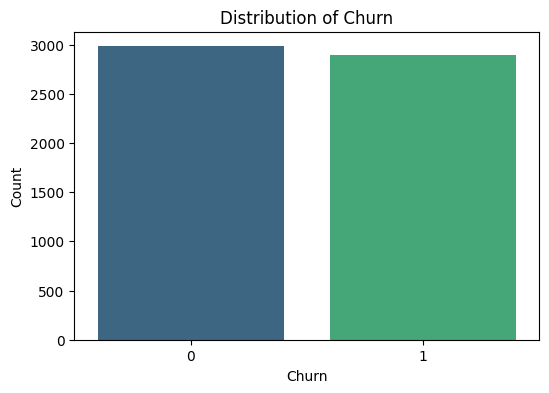

In [50]:
#  Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn', palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

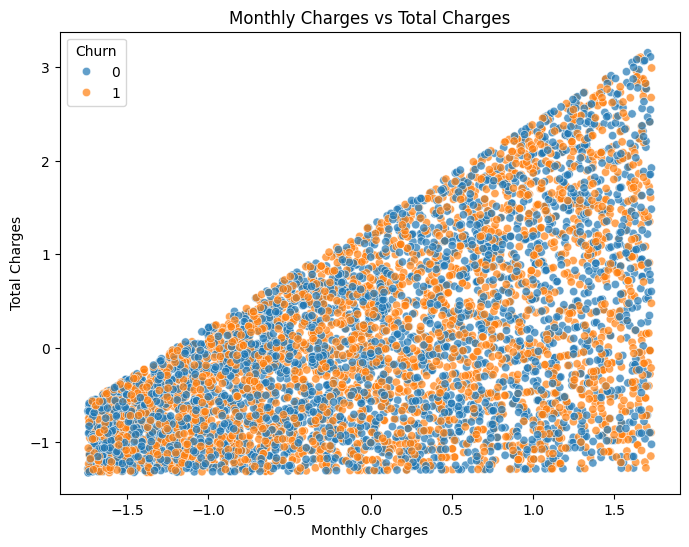

In [51]:
# Monthly Charges vs Total Charges (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.show()


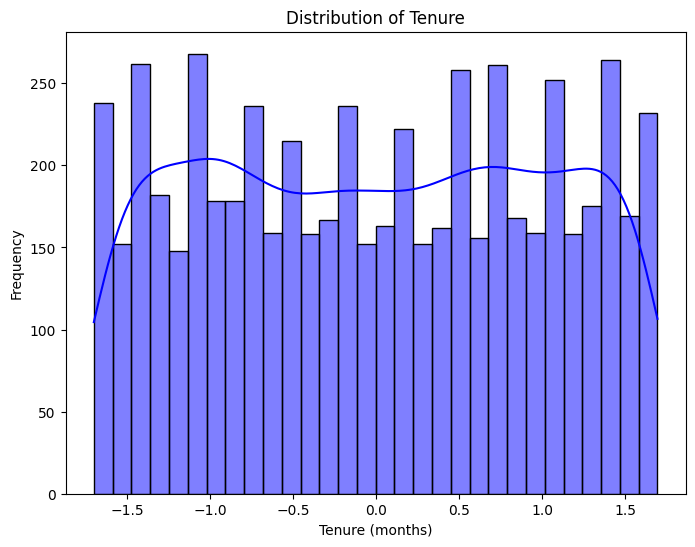

In [52]:
#  Tenure distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='tenure', bins=30, kde=True, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

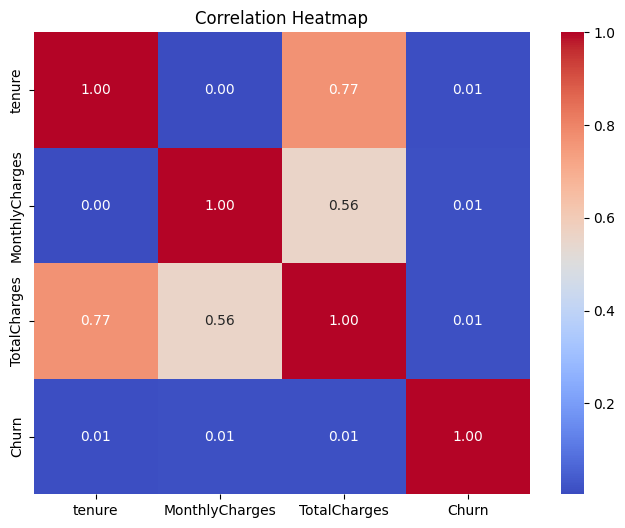

In [53]:
#  Correlation heatmap (numerical features only)
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_features + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

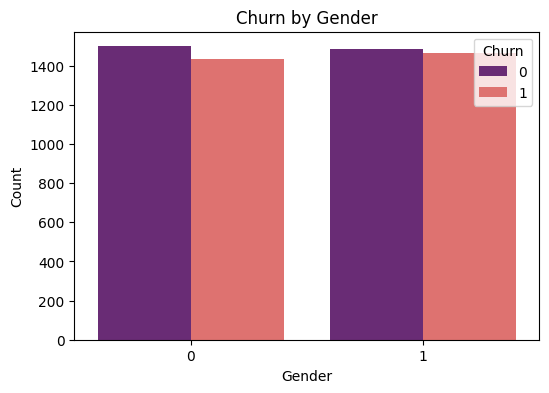

In [54]:

# 6. Gender vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gender', hue='Churn', palette='magma')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       596
           1       0.49      0.40      0.44       580

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.49      1176
weighted avg       0.50      0.50      0.50      1176

Accuracy: 0.5008503401360545


#### <i> Random Forest Classifier </i>

In [56]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       596
           1       0.49      0.45      0.47       580

    accuracy                           0.50      1176
   macro avg       0.50      0.50      0.50      1176
weighted avg       0.50      0.50      0.50      1176

Accuracy: 0.4965986394557823


#### <i> SVM </i>

In [57]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Results:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57       596
           1       0.48      0.32      0.38       580

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.48      1176

Accuracy: 0.4931972789115646


#### <i> COmpariosn Of All Models </i>


Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression  0.500850
1        Random Forest  0.496599
2                  SVM  0.493197


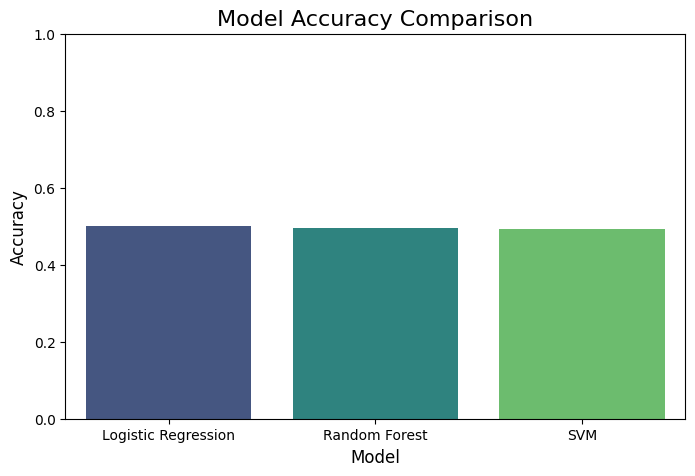

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Store accuracy results in a dictionary
model_performance = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logistic),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
}

# Convert to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Print the comparison table
print("\nModel Performance Comparison:")
print(performance_df)

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=performance_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.show()
